In [1]:
try:
    %cd openscope_databook
    from databook_utils.dandi_utils import dandi_download_open
    %cd ..
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .
    
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from dandi import dandiapi
from pynwb import NWBHDF5IO
from math import sqrt
from scipy import interpolate
import scipy.signal
from scipy.ndimage import gaussian_filter
from scipy.signal import welch
import math
import quantities as pq
#from tqdm import tqdm
#import xarray as xr
import os
import gc

# Import the FOOOF object
from fooof import FOOOF
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model

%matplotlib inline
sub_sessions = [("sub-619296", "ses-1187930705"), ("sub-620333", "ses-1188137866"), ("sub-620334", "ses-1189887297"), ("sub-625545", "ses-1182865981"), ("sub-625554", "ses-1181330601"), ("sub-625555", "ses-1183070926"), ("sub-630506", "ses-1192952695"), ("sub-631510", "ses-1196157974"), ("sub-631570", "ses-1194857009"), ("sub-633229", "ses-1199247593"), ("sub-637484", "ses-1208667752")]
#read nwb file
session_num = 0 #1, 5 can't open
filepath = f"../material/00248_v240130/{sub_sessions[session_num][0]}/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}_ogen.nwb"
stim_io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)
stim_nwb = stim_io.read()


C:\Users\USER\anaconda3\envs\py31013\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\USER\Desktop\minseok_kim\code\openscope_databook


C:\Users\USER\anaconda3\envs\py31013\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


C:\Users\USER\Desktop\minseok_kim\code


C:\Users\USER\anaconda3\envs\py31013\lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\USER\anaconda3\envs\py31013\lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  return func(args[0], **pargs)
C:\Users\USER\anaconda3\envs\py31013\lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


In [2]:
probe_num = 2

stim_num = [110000, 110101, 110105, 110106, 110107, 110109, 110110, 110111, 110506, 110511, 111105, 111109, 111201, 111299, 111301, 111302, 111303, 111304, 111305, 111306, 111307, 111308]
frame_stimtype = [(3, 'IC1'), (7, 'IC2'), (4, 'LC1'), (6, 'LC2'), (8, 'IRE1'), (9, 'IRE2'), (10, 'TRE1'), (11, 'TRE2'), (0, '0')]

lfp_filepath = f"../material/00248_v240130/{sub_sessions[session_num][0]}/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}_probe-" + str(probe_num) + "_ecephys.nwb"
lfp_io = NWBHDF5IO(lfp_filepath, mode="r", load_namespaces=True)
lfp_nwb = lfp_io.read()
lfp = lfp_nwb.acquisition["probe_" + str(probe_num) + "_lfp_data"]

In [3]:
for i in range(len(lfp.electrodes)) :
    print(i, lfp.electrodes['location'][i], round(lfp.electrodes['probe_vertical_position'][i]/1000, 3), round(lfp.electrodes['y'][i]/1000, 3))

0 SCig 0.04 3.111
1 SCig 0.08 3.076
2 SCig 0.12 3.04
3 SCig 0.16 2.996
4 SCig 0.2 2.961
5 SCig 0.24 2.925
6 SCig 0.28 2.89
7 SCig 0.32 2.854
8 SCig 0.36 2.819
9 SCig 0.4 2.775
10 SCig 0.44 2.739
11 SCig 0.48 2.704
12 SCig 0.52 2.668
13 SCig 0.56 2.633
14 SCig 0.6 2.597
15 SCig 0.64 2.553
16 SCig 0.68 2.518
17 SCig 0.72 2.483
18 SCig 0.76 2.447
19 POST 0.8 2.421
20 POST 0.84 2.385
21 POST 0.88 2.359
22 POST 0.92 2.323
23 POST 0.96 2.297
24 POST 1.0 2.27
25 POST 1.04 2.234
26 POST 1.08 2.208
27 POST 1.12 2.172
28 POST 1.16 2.145
29 POST 1.2 2.118
30 POST 1.24 2.081
31 POST 1.28 2.054
32 POST 1.32 2.017
33 HPF 1.36 1.989
34 HPF 1.4 1.962
35 HPF 1.44 1.924
36 HPF 1.48 1.896
37 HPF 1.52 1.858
38 HPF 1.56 1.83
39 HPF 1.6 1.801
40 HPF 1.64 1.763
41 HPF 1.68 1.734
42 HPF 1.72 1.695
43 HPF 1.76 1.666
44 HPF 1.8 1.637
45 HPF 1.84 1.598
46 HPF 1.88 1.568
47 VISp6b 1.92 1.529
48 VISp6a 1.96 1.5
49 VISp6a 2.0 1.46
50 VISp6a 2.04 1.431
51 VISp6a 2.08 1.401
52 VISp6a 2.12 1.362
53 VISp5 2.16 1.333
54

In [4]:
def get_all_stim_times(stim_nwb, frame_num):
    stim_table = stim_nwb.intervals["ICwcfg1_presentations"] #chosen stimulus

    frame = stim_table.frame[:]
    nzframe_idxs = np.nonzero(frame)[0]
    start_idx = int(nzframe_idxs[0])
    end_idx = int(nzframe_idxs[-1])

    start_time = stim_table.start_time[start_idx]
    end_time = stim_table.stop_time[end_idx]

    stim_select = lambda row : int(row['frame'].iloc[0]) == frame_num
    all_stim_times = [float(row['start_time'].iloc[0]) for i, row in enumerate(stim_table) if i % 2 == 0 and stim_select(row) and i >= start_idx and i <= end_idx]
    print(len(all_stim_times))
    return all_stim_times


def get_timestamps_data(lfp, all_stim_times):
    #print("First timestamp stimulus data: ", all_stim_times[0])
    #print("Last timestamp stimulus data: ", all_stim_times[-1])
    #print("First timestamp LFP data: ", lfp.timestamps[0])
    #print("Last timestamp LFP data: ", lfp.timestamps[-1])
    period_start = lfp.timestamps[0]
    period_end = lfp.timestamps[-1]
    # filter stim_timestamps to just timestamps within period
    stim_times = np.array([ts for ts in all_stim_times if ts >= period_start and ts <= period_end])
    if len(stim_times) == 0:
        raise ValueError("There are no stimulus timestamps in that period")

    # find indices within lfp data that correspond to period bounds
    period_start_idx, period_end_idx = None, None
    for i, ts in enumerate(lfp.timestamps):
        if not period_start_idx and ts >= period_start:
            period_start_idx = i
        if period_start_idx and ts >= period_end:
            period_end_idx = i
            break

    if period_start_idx == None or period_end_idx == None:
        raise ValueError("Period bounds not found within lfp data")
    #print(period_start_idx, lfp.timestamps[period_start_idx])
    # get slice of LFP data corresponding to the period bounds
    lfp_timestamps = lfp.timestamps[period_start_idx:period_end_idx]
    lfp_data = lfp.data[period_start_idx:period_end_idx]
    return lfp_timestamps, lfp_data, stim_times

def get_interp_lfp(interp_hz, lfp_timestamps, lfp_data) :
    
    # generate regularly-space x values and interpolate along it
    time_axis = np.arange(lfp_timestamps[0], lfp_timestamps[-1], step=(1/interp_hz))
    interp_channels = []

    # interpolate channel by channel to save RAM
    for channel in range(lfp_data.shape[1]):
        f = interpolate.interp1d(lfp_timestamps, lfp_data[:,channel], axis=0, kind="nearest", fill_value="extrapolate")
        interp_channels.append(f(time_axis))

    interp_lfp = np.transpose(interp_channels)
    return interp_lfp

def get_windows(window_start_time, window_end_time, interp_hz, stim_times, lfp_timestamps, interp_lfp) :
    # validate window bounds
    if window_start_time > 0:
        raise ValueError("start time must be non-positive number")
    if window_end_time <= 0:
        raise ValueError("end time must be positive number")

    # get event windows
    windows = []
    window_length = int((window_end_time-window_start_time) * interp_hz)

    for stim_ts in stim_times:
        # convert time to index
        #print(stim_ts)
        start_idx = int( (stim_ts + window_start_time - lfp_timestamps[0]) * interp_hz )
        end_idx = start_idx + window_length

        # bounds checking
        if start_idx < 0 or end_idx > len(interp_lfp):
            print("bound out", start_idx, end_idx)
            continue

        windows.append(interp_lfp[start_idx:end_idx])

    if len(windows) == 0:
        raise ValueError("There are no windows for these timestamps")

    windows = np.array(windows)
    return windows

interp_hz = 1000
stim_window_start_time = -0.0
stim_window_end_time = 0.4
stim_windows = []

for frame_num in range(len(stim_num)) :
    print(frame_num)
    all_stim_times_temp = get_all_stim_times(stim_nwb, frame_num)
    lfp_timestamps_temp, lfp_data_temp, stim_times_temp = get_timestamps_data(lfp, all_stim_times_temp)
    interp_lfp_temp = get_interp_lfp(interp_hz, lfp_timestamps_temp, lfp_data_temp)
    stim_windows.append(get_windows(stim_window_start_time, stim_window_end_time, interp_hz, stim_times_temp, lfp_timestamps_temp, interp_lfp_temp))

print("gc")
del stim_nwb
stim_io.close()
del stim_io
del lfp
del lfp_nwb
lfp_io.close()
del lfp_io
gc.collect()


0
400
1
400
2
400
3
400
4
400
5
400
6
400
7
400
8
50
9
50
10
400
11
400
12
400
13
400
14
50
15
50
16
50
17
50
18
50
19
50
20
50
21
50
gc


62896

In [5]:
#save LFP
os.makedirs(f'../material/LFP_npy_data/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}', exist_ok = True)
for frame_num in range(len(stim_num)) : 
    np.save(f'../material/LFP_npy_data/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}/frame_{frame_num}', stim_windows[frame_num])

In [4]:
#load LFP data
import numpy as np
import matplotlib.pyplot as plt
import os

sub_sessions = [("sub-619296", "ses-1187930705"), ("sub-620333", "ses-1188137866"), ("sub-620334", "ses-1189887297"), ("sub-625545", "ses-1182865981"), ("sub-625554", "ses-1181330601"), ("sub-625555", "ses-1183070926"), ("sub-630506", "ses-1192952695"), ("sub-631510", "ses-1196157974"), ("sub-631570", "ses-1194857009"), ("sub-633229", "ses-1199247593"), ("sub-637484", "ses-1208667752")]
stim_num = [110000, 110101, 110105, 110106, 110107, 110109, 110110, 110111, 110506, 110511, 111105, 111109, 111201, 111299, 111301, 111302, 111303, 111304, 111305, 111306, 111307, 111308]

sess_stim_windows = [] # (session #, frame #, trial #, time, channel)
for session_num in range(len(sub_sessions)) :
    if session_num == 1 or session_num == 5 : #invalid session
        sess_stim_windows.append([]);
        continue
    stim_windows = []
    for frame_num in range(len(stim_num)) : 
        stim_windows.append(np.load(f'../material/LFP_npy_data/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}/frame_{frame_num}.npy'))
    sess_stim_windows.append(stim_windows)

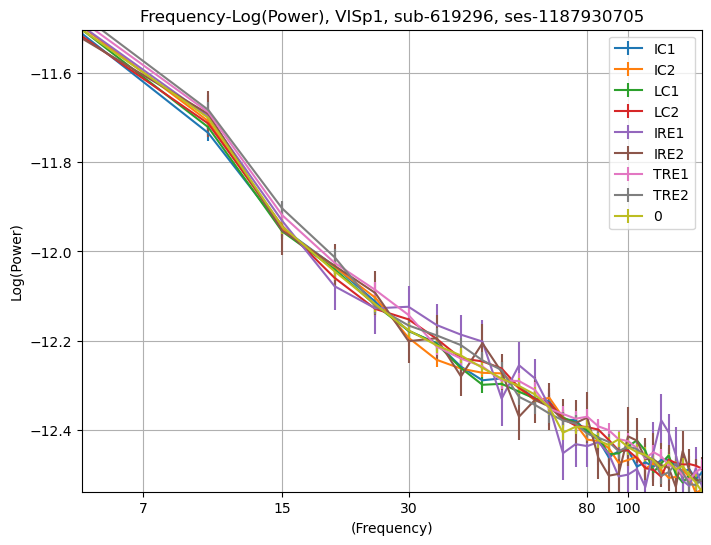

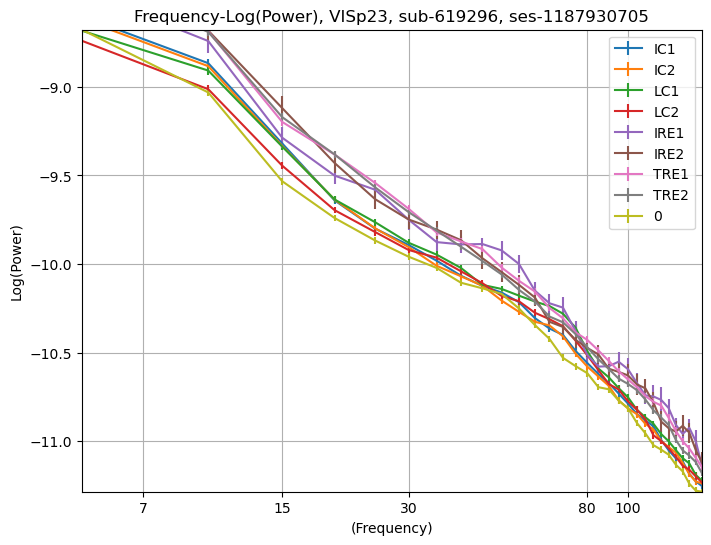

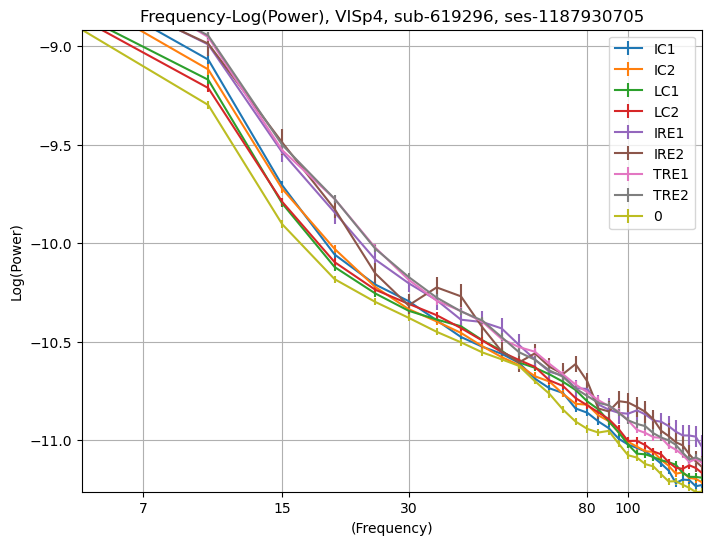

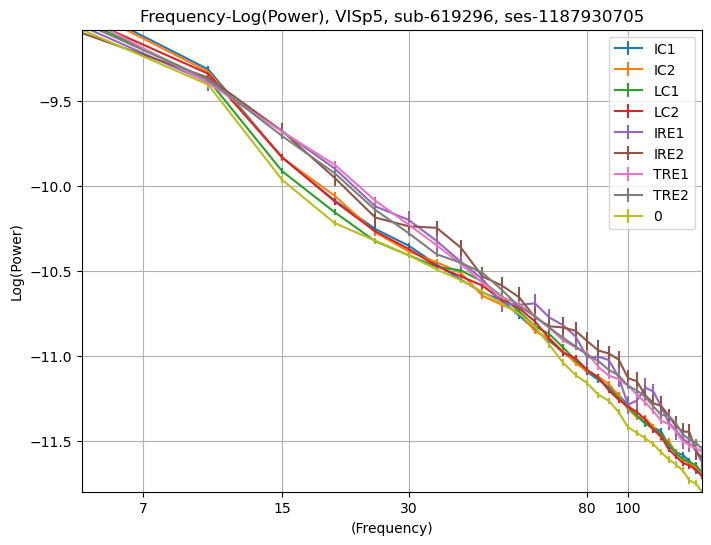

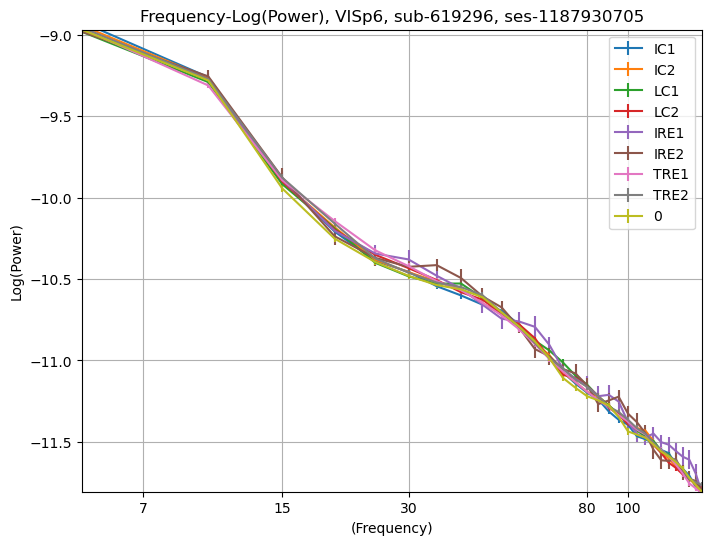

34134

In [5]:
# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

from scipy.stats import sem

session_num = 0

frame_stimtype = [(3, 'IC1'), (7, 'IC2'), (4, 'LC1'), (6, 'LC2'), (8, 'IRE1'), (9, 'IRE2'), (10, 'TRE1'), (11, 'TRE2'), (0, '0')]

rep_window_loc = [
[(73, "VISp1"), (67, "VISp23"), (61, "VISp4"), (56, "VISp5"), (49, "VISp6")],
[('-', "VISp1"), ('-', "VISp23"), ('-', "VISp4"), ('-', "VISp5"), ('-', "VISp6")],
[(70, "VISp1"), (65, "VISp23"), (62, "VISp4"), (59, "VISp5"), (55, "VISp6")],
[(76, "VISp1"), (72, "VISp23"), (68, "VISp4"), (64, "VISp5"), (57, "VISp6")],
[(74, "VISp1"), (69, "VISp23"), (64, "VISp4"), (60, "VISp5"), (55, "VISp6")],
[('-', "VISp1"), ('-', "VISp23"), ('-', "VISp4"), ('-', "VISp5"), ('-', "VISp6")],
[(77, "VISp1"), (74, "VISp23"), (70, "VISp4"), (66, "VISp5"), (60, "VISp6")],
[(56, "VISp1"), (52, "VISp23"), (48, "VISp4"), (45, "VISp5"), (40, "VISp6")],
[(75, "VISp1"), (71, "VISp23"), (67, "VISp4"), (62, "VISp5"), (56, "VISp6")],
[(74, "VISp1"), (71, "VISp23"), (67, "VISp4"), (63, "VISp5"), (57, "VISp6")],
[(76, "VISp1"), (73, "VISp23"), (70, "VISp4"), (66, "VISp5"), (60, "VISp6")]
]

fs = 1000
target_windows = stim_windows
#target_channel = 61


# Plot the loaded signal
#plot_time_series(times, sig, xlim=[0, 1.2])

# plt.figure(figsize=(8, 6))

# for channel, layer in rep_window_loc :
#     psds_list = []
#     for trial in range(target_windows.shape[0]) :
#         dspsig = target_windows[trial, :, channel]
#         freq_mean, psd_mean = compute_spectrum(dspsig, fs, method='welch', avg_type='mean', nperseg=fs*0.4)
#         psds_list.append(psd_mean)
#     psds = np.array(psds_list)
#     psd_average = np.average(psds, axis = 0)
#     #print(psd_average.shape)
#     plt.plot(np.log10(freq_mean[1:]), np.log10(psd_average[1:]), label = layer)
# plt.xlim(np.log10(freq_mean[1]), 2)
#     #plt.xscale('log')
# plt.xticks([np.log10(8), np.log10(12), np.log10(30), np.log10(60)], [8, 12, 30, 60])
# plt.xlabel('(Frequency)')
# plt.ylabel('Log(Power)')
# plt.title('Frequency-Log(Power)')
# plt.grid(True)
# plt.legend()
# plt.ylim([-13, -7.5])
# plt.show()
#     #plot_power_spectra(freq_mean, psd_average, 'Welch')

for channel, layer in rep_window_loc[session_num] :
    plt.figure(figsize=(8, 6))
    for frame_num, stimtype in frame_stimtype :
        times = create_times(target_windows[frame_num].shape[1]/fs, fs)
        psds_list = []
        for trial in range(target_windows[frame_num].shape[0]) :
            dspsig = target_windows[frame_num][trial, :, channel]
            freq_mean, psd_mean = compute_spectrum(dspsig, fs, method='welch', avg_type='mean', nperseg=fs*0.2)
            psds_list.append(psd_mean)
        psds = np.array(psds_list)
        psd_average = np.average(psds, axis = 0)
        #print(psd_average.shape)
        plt.errorbar(np.log10(freq_mean[1:]), np.log10(psd_average[1:]), yerr = sem(np.log10(psds))[1:], label = stimtype)
    plt.xlim(np.log10(freq_mean[1]), np.log10(150))
    plt.xticks([np.log10(7), np.log10(15), np.log10(30), np.log10(80), np.log10(100)], [7, 15, 30, 80, 100])
    plt.xlabel('(Frequency)')
    plt.ylabel('Log(Power)')
    plt.title('Frequency-Log(Power), ' + layer + ", " + sub_sessions[session_num][0] + ", " + sub_sessions[session_num][1])
    plt.grid(True)
    plt.legend()
    plt.ylim([np.log10(psd_average[30]), np.log10(psd_average[1])])
    os.makedirs(f'../material/PSD/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}', exist_ok = True)
    plt.savefig(f'../material/PSD/{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}/PSD_{layer}_{sub_sessions[session_num][0]}_{sub_sessions[session_num][1]}.jpg', format='jpeg')
    plt.show()
    plt.close()
  
    
# for trial in range(target_windows[frame_num].shape[0]) :
#     dspsig = target_windows[frame_num][trial, :, target_channel]
#     freq_mean, psd_mean = compute_spectrum(dspsig, fs, method='welch', avg_type='mean', nperseg=fs*0.4)
#     psds_list.append(psd_mean)
# psds = np.array(psds_list)
# psd_average = np.average(psds, axis = 0)
# # Initialize FOOOF object
# fm = FOOOF()

# # Define frequency range across which to model the spectrum
# freq_range = [0, 200]

# # Model the power spectrum with FOOOF, and print out a report
# #for i in range(psd.shape[1]):
# #    fm.report(freqs, psd[:, i], freq_range)
# # fig = fm.report(freq_mean, psd_average, freq_range, plt_log=True)

# fm.fit(freq_mean, psd_average, freq_range)
# fig = fm.plot(plt_log = True)

# #plot_annotated_model(fm, plt_log=True)

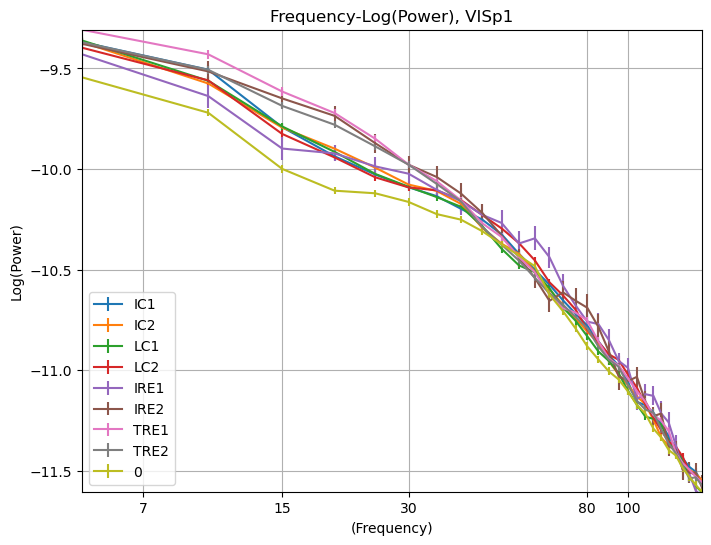

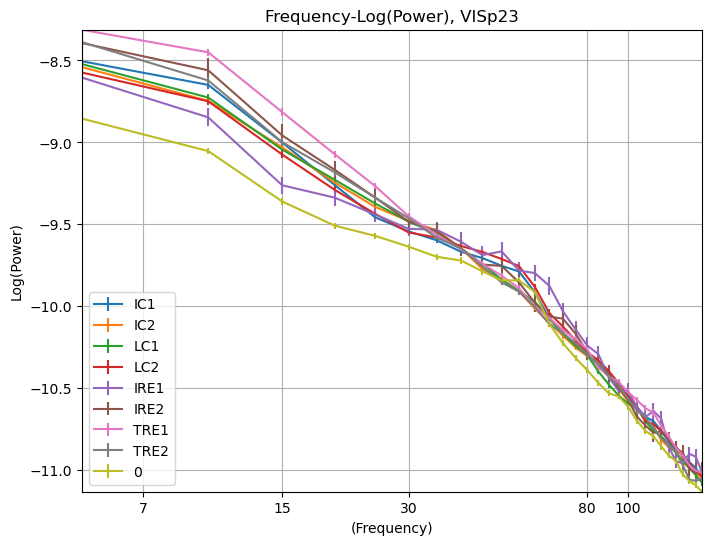

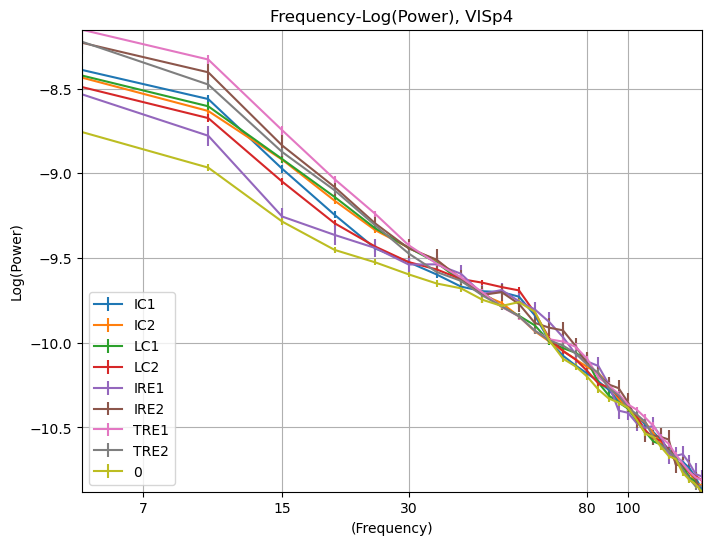

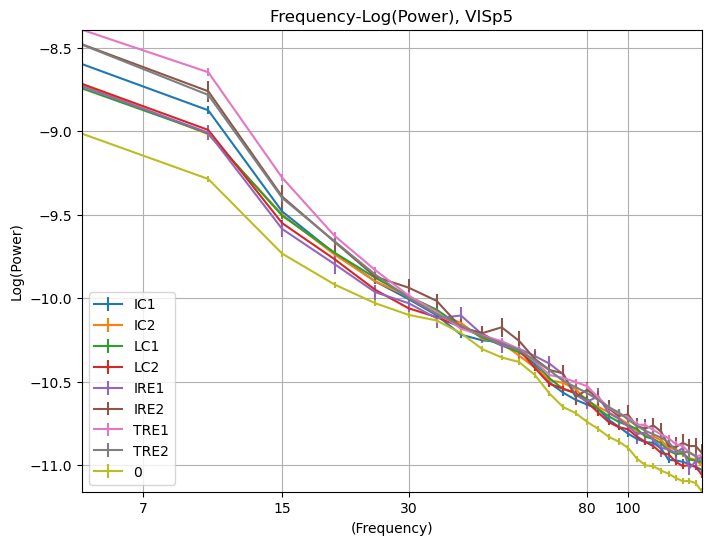

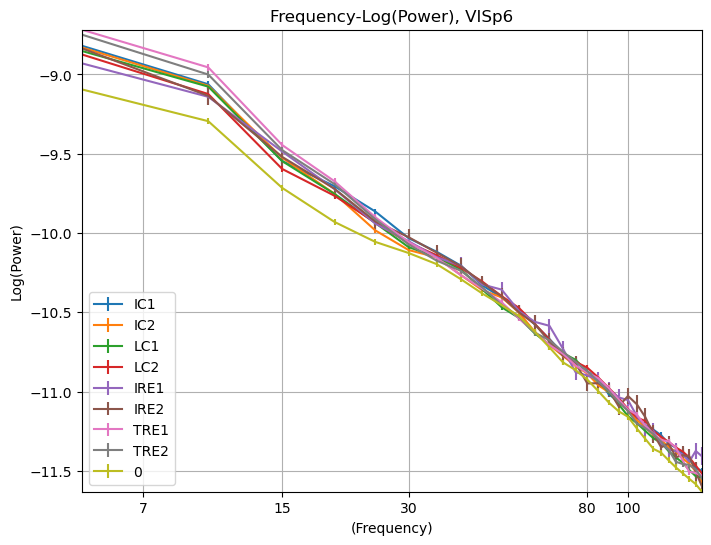

In [42]:
# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

from scipy.stats import sem

session_num = 0

frame_stimtype = [(3, 'IC1'), (7, 'IC2'), (4, 'LC1'), (6, 'LC2'), (8, 'IRE1'), (9, 'IRE2'), (10, 'TRE1'), (11, 'TRE2'), (0, '0')]
layer_channel = {"VISp1":[73, '-', 70, 76, 74, '-', 77, 56, 75, 74, 76], "VISp23":[67, '-', 65, 72, 69, '-', 74, 52, 71, 71, 73],
          "VISp4":[61, '-', 62, 68, 64, '-', 70, 48, 67, 67, 70], "VISp5":[56, '-', 59, 64, 60, '-', 66, 45, 62, 63, 66],
          "VISp6":[49, '-', 55, 57, 55, '-', 60, 40, 56, 57, 60]}

fs = 1000
target_windows = stim_windows

for layer in layer_channel.keys():
    plt.figure(figsize=(8, 6))
    highest = -20
    for frame_num, stimtype in frame_stimtype :
        for session_num in range(len(layer_channel[layer])) :
            if session_num == 1 or session_num == 5 : #invalid session
                continue
            channel = layer_channel[layer][session_num]
            target_windows = sess_stim_windows[session_num]
            times = create_times(target_windows[frame_num].shape[1]/fs, fs)
            psds_list = []
            for trial in range(target_windows[frame_num].shape[0]) :
                dspsig = target_windows[frame_num][trial, :, channel]
                freq_mean, psd_mean = compute_spectrum(dspsig, fs, method='welch', avg_type='mean', nperseg=fs*0.2)
                psds_list.append(psd_mean)
        psds = np.array(psds_list)
        psd_average = np.average(psds, axis = 0)
        highest = max(highest, np.log10(psd_average[1]));
        plt.errorbar(np.log10(freq_mean[1:]), np.log10(psd_average[1:]), yerr = sem(np.log10(psds))[1:], label = stimtype)
    plt.xlim(np.log10(freq_mean[1]), np.log10(150))
    plt.xticks([np.log10(7), np.log10(15), np.log10(30), np.log10(80), np.log10(100)], [7, 15, 30, 80, 100])
    plt.xlabel('(Frequency)')
    plt.ylabel('Log(Power)')
    plt.title('Frequency-Log(Power), ' + layer)
    plt.grid(True)
    plt.legend(loc = 'lower left')
    plt.ylim([np.log10(psd_average[30]), highest])
    os.makedirs(f'../material/PSD_across_session/', exist_ok = True)
    plt.savefig(f'../material/PSD_across_session/PSD_across_session_{layer}.jpg', format='jpeg')
    plt.show()
    plt.close()

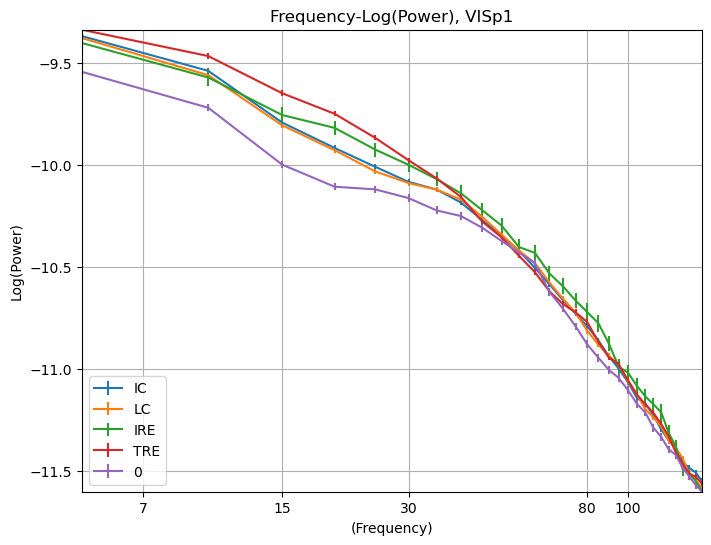

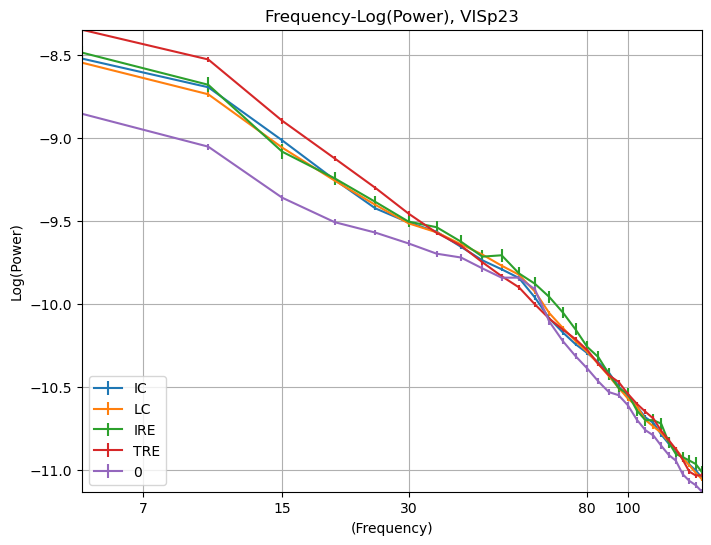

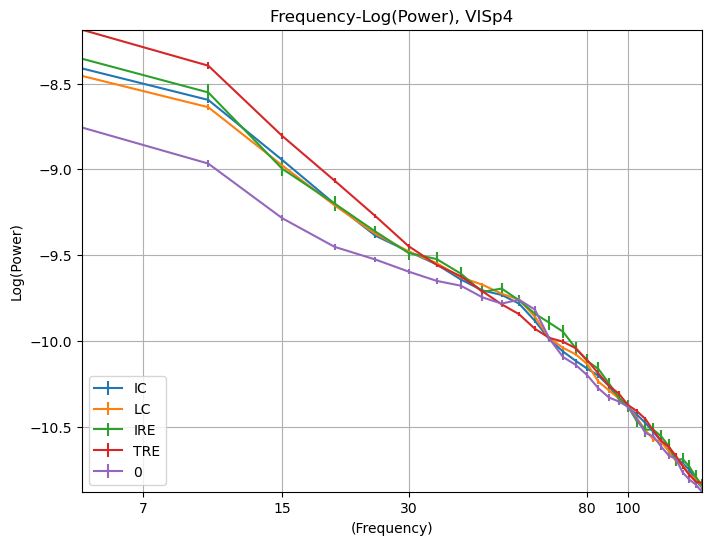

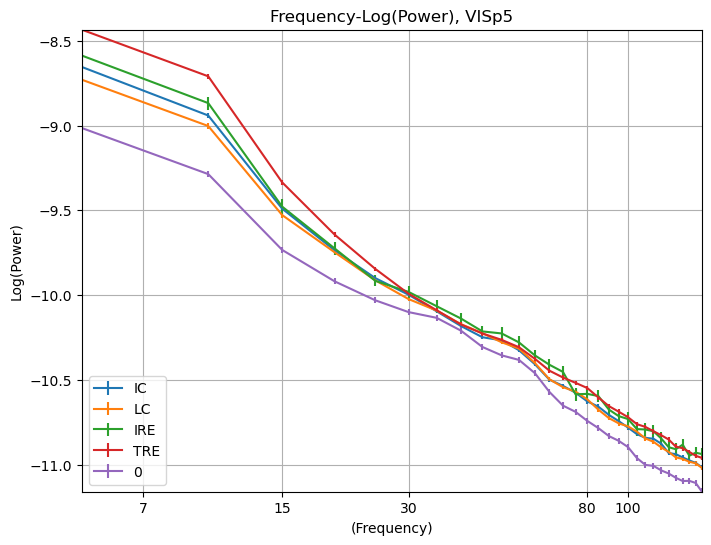

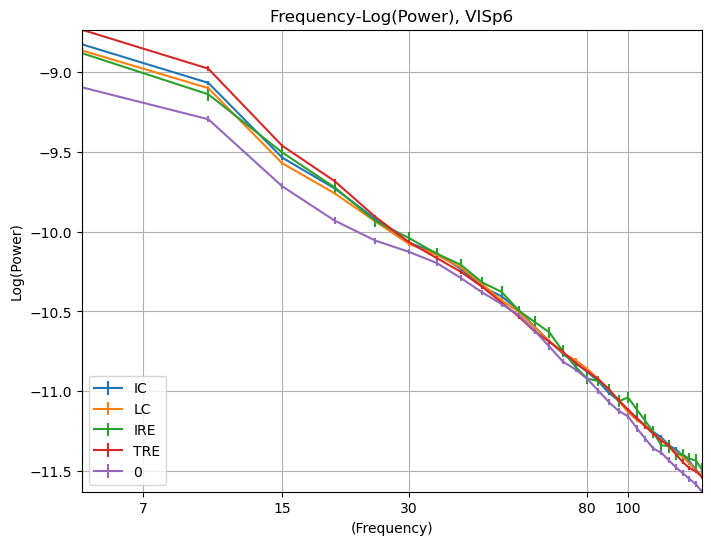

In [5]:
# Import spectral power functions
from neurodsp.spectral import compute_spectrum, rotate_powerlaw

# Import utilities for loading and plotting data
from neurodsp.utils import create_times
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

from scipy.stats import sem

session_num = 0

frame_stimtype = [((3, 7), 'IC'), ((4, 6), 'LC'), ((8, 9), 'IRE'), ((10, 11), 'TRE'), ((0, 0), '0')]
layer_channel = {"VISp1":[73, '-', 70, 76, 74, '-', 77, 56, 75, 74, 76], "VISp23":[67, '-', 65, 72, 69, '-', 74, 52, 71, 71, 73],
          "VISp4":[61, '-', 62, 68, 64, '-', 70, 48, 67, 67, 70], "VISp5":[56, '-', 59, 64, 60, '-', 66, 45, 62, 63, 66],
          "VISp6":[49, '-', 55, 57, 55, '-', 60, 40, 56, 57, 60]}

fs = 1000
target_windows = stim_windows

for layer in layer_channel.keys():
    plt.figure(figsize=(8, 6))
    highest = -20
    for (frame_num1, frame_num2), stimtype in frame_stimtype :
        for session_num in range(len(layer_channel[layer])) :
            if session_num == 1 or session_num == 5 : #invalid session
                continue
            channel = layer_channel[layer][session_num]
            target_windows = sess_stim_windows[session_num]
            times = create_times(target_windows[frame_num1].shape[1]/fs, fs)
            psds_list = []
            for trial in range(target_windows[frame_num1].shape[0]) :
                dspsig = target_windows[frame_num1][trial, :, channel]
                freq_mean, psd_mean = compute_spectrum(dspsig, fs, method='welch', avg_type='mean', nperseg=fs*0.2)
                psds_list.append(psd_mean)
            if frame_num2 == 0 : continue
            for trial in range(target_windows[frame_num2].shape[0]) :
                dspsig = target_windows[frame_num2][trial, :, channel]
                freq_mean, psd_mean = compute_spectrum(dspsig, fs, method='welch', avg_type='mean', nperseg=fs*0.2)
                psds_list.append(psd_mean)
        psds = np.array(psds_list)
        psd_average = np.average(psds, axis = 0)
        highest = max(highest, np.log10(psd_average[1]));
        plt.errorbar(np.log10(freq_mean[1:]), np.log10(psd_average[1:]), yerr = sem(np.log10(psds))[1:], label = stimtype)
    plt.xlim(np.log10(freq_mean[1]), np.log10(150))
    plt.xticks([np.log10(7), np.log10(15), np.log10(30), np.log10(80), np.log10(100)], [7, 15, 30, 80, 100])
    plt.xlabel('(Frequency)')
    plt.ylabel('Log(Power)')
    plt.title('Frequency-Log(Power), ' + layer)
    plt.grid(True)
    plt.legend(loc = 'lower left')
    plt.ylim([np.log10(psd_average[30]), highest])
    os.makedirs(f'../material/PSD_across_session/', exist_ok = True)
    plt.savefig(f'../material/PSD_across_session/PSD_across_session_no_rot_{layer}.jpg', format='jpeg')
    plt.show()
    plt.close()

z-value: 4.876532726084325
p-value: 5.398339142370645e-07
